<div style="color:white;display:fill;border-radius:8px;
            background-color:#04EEFF;font-size:150%;
            letter-spacing:1.0px">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#2B0245'>COVID-detect: Your reliable guide to detecting and combating the coronavirus</span></b></b></p>
</div>


I'm glad to hear that we have overcome COVID-19! It has been a difficult and trying time for so many people around the world, but through determination, resilience, and cooperation, we were able to defeat this formidable foe. Now, life is returning to a sense of normalcy, and we can all breathe a sigh of relief knowing that the worst is behind us. It is a time to celebrate and be grateful for the progress we have made, and to look forward to a brighter future. Let's take the lessons we have learned from this experience and use them to build a more compassionate and supportive society for all.

<img src="https://media.istockphoto.com/id/1211544068/vector/virus-bacteria-vector-background-cells-disease-outbreak-coronavirus-alert-pattern.jpg?s=612x612&w=0&k=20&c=Whe1hWxGtIB35HaGUdN0_4HBQ9-q8H6iGOAbTVfe3oc="  width="40%" height="20%">


COVID-19 detection models using X-ray images involve using machine learning algorithms to analyze X-ray images of the chest in order to identify patterns and features associated with COVID-19 infections. These models are trained on large datasets of X-ray images that have been labeled as positive or negative for COVID-19, and can then be used to predict the likelihood of a COVID-19 infection based on the features present in a new X-ray image.

One potential benefit of using X-ray images for COVID-19 detection is that X-rays are relatively cheap and widely available, making them a practical tool for mass screening and diagnosis. Additionally, X-ray images can provide important information about the severity of a COVID-19 infection, such as the extent of lung damage or the presence of other respiratory conditions.

While X-ray images alone may not be sufficient for definitive diagnosis of COVID-19, they can be a valuable component of a multi-modal approach to COVID-19 detection that includes other diagnostic tests such as PCR (polymerase chain reaction) testing and antibody testing.


> ***Let's see it in brief 🙌***

# <b><span style='color:#2B0245'>2 | Installation of packages</span></b>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#04EEFF;font-size:150%;
            letter-spacing:1.0px">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#2B0245'>2.1 | Livelossplot installation</span></b></b></p>
</div>

### <b><span style='color:#274C5C'>WHAT IS LIVELOSSPLOT?</span></b>

Livelossplot is a Python library that can be used to create live plots of loss and evaluation metrics during the training of machine learning models. It is often used in combination with deep learning frameworks such as Keras and PyTorch.

Livelossplot allows users to visualize the progress of their model training in real-time, which can be useful for identifying trends, debugging, and optimizing model performance. It is especially helpful when training deep learning models, which can be complex and time-consuming to train.

To use livelossplot, users simply need to specify the loss and evaluation metrics they want to track, and the library will create a dynamic plot that updates as the model is trained. Users can also customize the appearance of the plot, such as the colors, line styles, and legend labels.



In [6]:
! pip install livelossplot

In [7]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import os
from glob import glob
from PIL import Image
import numpy as np
import pandas as pd
import cv2
import random
import albumentations as A
import keras
import matplotlib.cm as cm
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import seaborn as sns
from livelossplot.inputs.keras import PlotLossesCallback
from keras.callbacks import ModelCheckpoint, EarlyStopping

from sklearn.model_selection import train_test_split
from keras.preprocessing import image
from tensorflow.keras import layers, models
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, recall_score, accuracy_score, precision_score, f1_score


<div style="color:white;display:fill;border-radius:8px;
            background-color:#04EEFF;font-size:150%;
            letter-spacing:1.0px">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#2B0245'>2.2 | Image data collection</span></b></b></p>
</div>

Here the images are categorised into classes and its path are collected & saved in a dataframe which can be used for manipulation later.

In [8]:
data_dir = "/content/drive/MyDrive/COVID-19_Radiography_Dataset"


In [9]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [10]:
import os

current_dir = os.getcwd()
print("Current working directory:", current_dir)
print("Contents of the current directory:", os.listdir(current_dir))


Current working directory: /content
Contents of the current directory: ['.config', 'drive', 'sample_data']


In [11]:
zip_path = "/content/drive/MyDrive/COVID-19_Radiography_Dataset.zip"


In [12]:
import zipfile

extract_path = "../input/covid19-radiography-database/"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Dataset extracted successfully!")


✅ Dataset extracted successfully!


In [13]:
files = ['Normal', 'COVID', 'Lung_Opacity','Viral Pneumonia']
path = "../input/covid19-radiography-database/COVID-19_Radiography_Dataset"
data_dir = os.path.join(path)

data = []
for id, level in enumerate(files):
    for file in os.listdir(os.path.join(data_dir, level+'/'+'images')):
#         data.append(['{}/{}'.format(level, file), level])
        data.append([level +'/' +'images'+ '/'+file, level])


data = pd.DataFrame(data, columns = ['image_file', 'corona_result'])

data['path'] = path + '/' +data['image_file']
data['corona_result'] = data['corona_result'].map({'Normal': 'Normal', 'COVID': 'Covid_positive', 'Lung_Opacity':'Lung_Opacity', 'Viral Pneumonia':'Viral_Pneumonia'})

data.head()

,image_file,corona_result,path
0,Normal/images/Normal-5983.png,Normal,../input/covid19-radiography-database/COVID-19...
1,Normal/images/Normal-9211.png,Normal,../input/covid19-radiography-database/COVID-19...
2,Normal/images/Normal-7233.png,Normal,../input/covid19-radiography-database/COVID-19...
3,Normal/images/Normal-324.png,Normal,../input/covid19-radiography-database/COVID-19...
4,Normal/images/Normal-9336.png,Normal,../input/covid19-radiography-database/COVID-19...


In [14]:
print('Number of Duplicated Samples: %d'%(data.duplicated().sum()))
print('Number of Total Samples: %d'%(data.isnull().value_counts()))


Number of Duplicated Samples: 0
Number of Total Samples: 21165


Total number of images used are 21165 as a consolidation of all classes.

# <b><span style='color:#2B0245'>3 | Exploratory Data Analysis</span></b>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#04EEFF;font-size:150%;
            letter-spacing:1.0px">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#2B0245'>3.1 | Data manipulation</span></b></b></p>
</div>

### <b><span style='color:#274C5C'>WHY DO WE USE PLOTLY FOR VISUALIZATION?</span></b>


Plotly is a data visualization library that allows users to create a wide range of static, interactive, and animated visualizations in Python. It is particularly useful for creating interactive visualizations that can be displayed in web browsers.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Plotly-logo.png/1200px-Plotly-logo.png"  width="50%" height="70%">

Some of the benefits of using Plotly for visualization include:

1. Ease of use: Plotly has a user-friendly interface and simple syntax, making it easy to create a wide range of plots and charts.

2. Customization: Plotly allows users to customize their plots and charts in a variety of ways, including changing the colors, fonts, and layout.

3. Interactivity: Plotly's interactive visualizations allow users to explore and understand their data in a more intuitive way. For example, users can hover over data points to see the underlying values or zoom in on a specific region of a plot.

4. Compatibility: Plotly visualizations can be easily shared and displayed in a variety of formats, including as standalone HTML files, within Jupyter notebooks, and on websites using Plotly's online hosting service.

Overall, Plotly is a powerful and flexible tool for creating high-quality data visualizations that can be easily shared and interacted with by others.





In our case, the below visulaization shows the count of data used over each classes.

In [15]:
no_of_samples = 21165
df = pd.DataFrame()
df['corona_result'] = ['Normal', 'Covid_positive', 'Lung_Opacity', 'Viral_Pneumonia']
df['Count'] = [len(data[data['corona_result'] == 'Normal']), len(data[data['corona_result'] == 'Covid_positive']), len(data[data['corona_result'] == 'Lung_Opacity']), len(data[data['corona_result'] == 'Viral_Pneumonia'])]
df = df.sort_values(by = ['Count'], ascending = False)

fig = px.bar(df, x = 'corona_result', y = 'Count',
             color = "corona_result",  width = 600,
             color_continuous_scale='BrBg')

fig.update_traces(textfont_size = 12, textangle = 0, textposition = "outside", cliponaxis = False)

fig.show()

The below code script is to convert the image path into numpy array and save it in the dataframe.
Here we are not using any easy functions such as tensorflow `flow_from_directory` and ect to do this image to array transformation easier.


In [16]:
data['image'] = data['path'].map(lambda x: np.asarray(Image.open(x).resize((75,75))))

In [17]:
mean_val = []
std_dev_val = []
max_val = []
min_val = []

for i in range(0, no_of_samples):
    mean_val.append(data['image'][i].mean())
    std_dev_val.append(np.std(data['image'][i]))
    max_val.append(data['image'][i].max())
    min_val.append(data['image'][i].min())

imageEDA = data.loc[:,['image','corona_result','path']]
imageEDA['mean'] = mean_val
imageEDA['stedev'] = std_dev_val
imageEDA['max'] = max_val
imageEDA['min'] = min_val

imageEDA['subt_mean'] = imageEDA['mean'].mean() - imageEDA['mean']

In [18]:
mean_normal = imageEDA["mean"].loc[(imageEDA["corona_result"] == "Normal")].to_numpy()
mean_covid = imageEDA["mean"].loc[(imageEDA["corona_result"] == "Covid_positive")].to_numpy()
mean_opacity = imageEDA["mean"].loc[(imageEDA["corona_result"] == "Lung_Opacity")].to_numpy()
mean_pneumonia = imageEDA["mean"].loc[(imageEDA["corona_result"] == "Viral_Pneumonia")].to_numpy()
mean_list = [mean_normal,mean_covid,mean_opacity,mean_pneumonia]

max_normal = imageEDA["max"].loc[(imageEDA["corona_result"] == "Normal")].to_numpy()
max_covid = imageEDA["max"].loc[(imageEDA["corona_result"] == "Covid_positive")].to_numpy()
max_opacity = imageEDA["max"].loc[(imageEDA["corona_result"] == "Lung_Opacity")].to_numpy()
max_pneumonia = imageEDA["max"].loc[(imageEDA["corona_result"] == "Viral_Pneumonia")].to_numpy()
max_list = [max_normal,max_covid,max_opacity,max_pneumonia]

min_normal = imageEDA["min"].loc[(imageEDA["corona_result"] == "Normal")].to_numpy()
min_covid = imageEDA["min"].loc[(imageEDA["corona_result"] == "Covid_positive")].to_numpy()
min_opacity = imageEDA["min"].loc[(imageEDA["corona_result"] == "Lung_Opacity")].to_numpy()
min_pneumonia = imageEDA["min"].loc[(imageEDA["corona_result"] == "Viral_Pneumonia")].to_numpy()
min_list = [min_normal,min_covid,min_opacity,min_pneumonia]

std_normal = imageEDA["stedev"].loc[(imageEDA["corona_result"] == "Normal")].to_numpy()
std_covid = imageEDA["stedev"].loc[(imageEDA["corona_result"] == "Covid_positive")].to_numpy()
std_opacity = imageEDA["stedev"].loc[(imageEDA["corona_result"] == "Lung_Opacity")].to_numpy()
std_pneumonia = imageEDA["stedev"].loc[(imageEDA["corona_result"] == "Viral_Pneumonia")].to_numpy()
std_list = [std_normal,std_covid,std_opacity,std_pneumonia]

Names = ['Normal','Covid','Lung opacity','Pneumonia']

In [19]:
def min_max_plot(data,name,title):
    colors = ['#04EEFF', '#4BBBFF', '#F5F232', '#7FFF00']

    # Create distplot with curve_type set to 'normal'
    fig = ff.create_distplot(data, name, show_hist=False, colors = colors)
    fig.update_layout(title_text=title,
                      titlefont={'size': 20},
                     template="plotly_dark",
                     width=800,height=600,)
    fig.show()

### <b><span style='color:#274C5C'>IMPORTANCE OF PLOTTING MAX VALUE DISTRIBUTION</span></b>
One possible use of plotting the maximum value distribution on an image dataset is to visualize the range of values present in the dataset. This can be helpful for understanding the characteristics of the dataset and identifying any potential issues or trends that may be present. For example, if the maximum value distribution is heavily skewed towards one end of the range, it may indicate that there are a large number of outliers present in the dataset. On the other hand, if the maximum value distribution is more evenly distributed, it may indicate that the dataset is more balanced and potentially easier to work with.

In addition to understanding the characteristics of the dataset, plotting the maximum value distribution can also be useful for identifying the appropriate scaling or normalization techniques to apply to the data. For example, if the maximum value distribution is heavily skewed, it may be necessary to apply a transformation such as log scaling to the data in order to better distribute the values.


In [20]:
min_max_plot(max_list,Names,"Images Colour Max Value Distribution by Class")

### <b><span style='color:#274C5C'>IMPORTANCE OF PLOTTING MIN VALUE DISTRIBUTION</span></b>

Like the maximum value distribution, plotting the minimum value distribution on an image dataset can be useful for understanding the characteristics of the dataset and identifying any potential issues or trends that may be present. For example, if the minimum value distribution is heavily skewed towards one end of the range, it may indicate that there are a large number of outliers present in the dataset. On the other hand, if the minimum value distribution is more evenly distributed, it may indicate that the dataset is more balanced and potentially easier to work with.

In addition to understanding the characteristics of the dataset, plotting the minimum value distribution can also be useful for identifying the appropriate scaling or normalization techniques to apply to the data. For example, if the minimum value distribution is heavily skewed, it may be necessary to apply a transformation such as log scaling to the data in order to better distribute the values.



In [21]:
min_max_plot(min_list,Names,"Images Colour Min Value Distribution by Class")

### <b><span style='color:#274C5C'>IMPORTANCE OF PLOTTING MEAN VALUE DISTRIBUTION</span></b>

Plotting the mean value distribution on an image dataset can be useful for understanding the overall characteristics of the dataset and identifying any potential issues or trends that may be present. For example, if the mean value distribution is heavily skewed towards one end of the range, it may indicate that there are a large number of outliers present in the dataset. On the other hand, if the mean value distribution is more evenly distributed, it may indicate that the dataset is more balanced and potentially easier to work with.

In addition to understanding the characteristics of the dataset, plotting the mean value distribution can also be useful for identifying the appropriate scaling or normalization techniques to apply to the data. For example, if the mean value distribution is heavily skewed, it may be necessary to apply a transformation such as log scaling to the data in order to better distribute the values.



In [22]:
min_max_plot(mean_list,Names,"Images Colour Mean Value Distribution by Class")

### <b><span style='color:#274C5C'>IMPORTANCE OF PLOTTING MEAN vs STANDARD DEVIATION OF IMAGES</span></b>

Scatter plotting the mean and standard deviation of image samples can be useful for understanding the characteristics of the dataset and identifying any potential issues or trends that may be present. For example, if the scatter plot shows a large amount of variance in the mean values of the samples, it may indicate that the dataset is highly heterogeneous and may require additional preprocessing or normalization. On the other hand, if the scatter plot shows little variance in the mean values of the samples, it may indicate that the dataset is more homogeneous and potentially easier to work with.

In addition to understanding the characteristics of the dataset, scatter plotting the mean and standard deviation of image samples can also be useful for identifying patterns or correlations between the two values. For example, if there is a positive correlation between the mean and standard deviation, it may indicate that the samples with higher mean values also tend to have higher standard deviations, and vice versa. This information can be useful for identifying potential trends or issues within the dataset.



In [23]:
fig = px.scatter(imageEDA, x="mean", y="stedev", color='corona_result',color_discrete_sequence=px.colors.qualitative.Set3)
fig.update_layout(title_text="Mean and Standard Deviation of Image Samples",
                  xaxis_title='Image Channel Colour Mean',
                  yaxis_title='Image Channel Colour Standard Deviation',
                  titlefont={'size': 20},
                  template="plotly_dark",
                  width=800,height=600,)
fig.show()


<div style="color:white;display:fill;border-radius:8px;
            background-color:#04EEFF;font-size:150%;
            letter-spacing:1.0px">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#2B0245'>3.2 | Let us play with images!</span></b></b></p>
</div>

### <b><span style='color:#274C5C'>PRINTING RANDOM IMAGES FROM ALL CLASSES</span></b>

To get started, let us visualize some images from all the four classes.

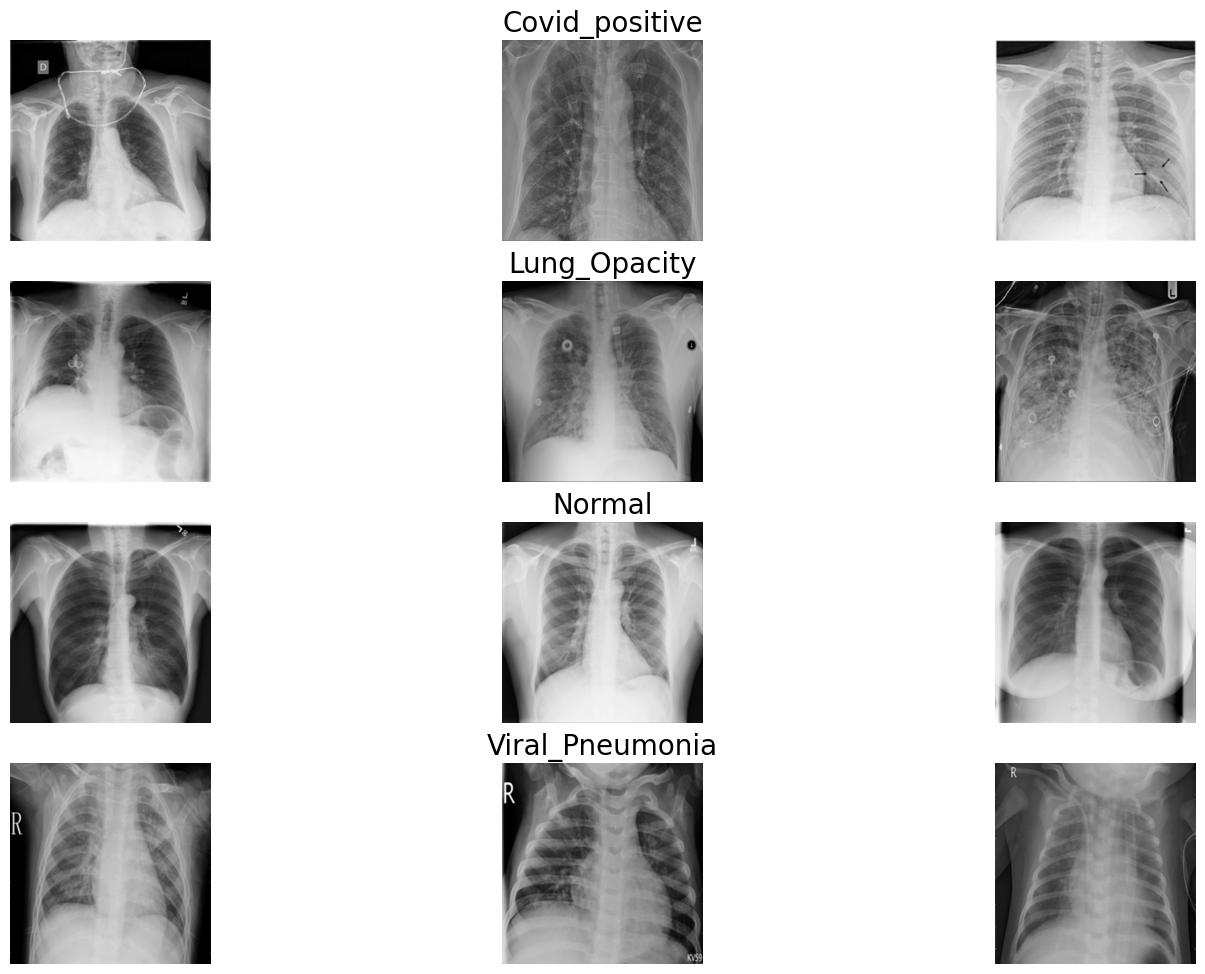

In [24]:
n_samples = 3

fig, m_axs = plt.subplots(4, n_samples, figsize = (6*n_samples, 3*4))

for n_axs, (type_name, type_rows) in zip(m_axs, data.sort_values(['corona_result']).groupby('corona_result')):
    n_axs[1].set_title(type_name, fontsize = 20)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state = 1234).iterrows()):
        picture = c_row['path']
        image = cv2.imread(picture)
        c_ax.imshow(image)
        c_ax.axis('off')


<div style="color:white;display:fill;border-radius:8px;
            background-color:#04EEFF;font-size:150%;
            letter-spacing:1.0px">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#2B0245'>3.3 | Types of image transformation applied and it's uses</span></b></b></p>
</div>

### <b><span style='color:#274C5C'>B CHANNEL IMAGES</span></b>

In image processing, the "b" channel typically refers to the blue channel of an image, which represents the intensity of blue color in each pixel. There are several reasons why it might be useful to convert an image to the b channel for exploratory data analysis (EDA):

1. **Simplicity**: Converting an image to a single channel can make it easier to focus on specific aspects of the image, such as the distribution of blue color, without being distracted by other colors.

2. **Visualization**: Converting an image to a single channel can make it easier to visualize and understand the distribution of pixel values within the image. For example, a grayscale image can be created by converting an image to the "l" channel (lightness), which can be useful for identifying patterns or features within the image.

3. **Preprocessing**: Converting an image to a single channel can be a useful preprocessing step for certain types of image analysis or machine learning tasks. For example, if a model is only sensitive to the blue channel of an image, it may be more efficient to convert the image to the b channel rather than processing all three channels.

Overall, converting an image to a single channel can be a useful technique for understanding and working with image data, depending on the specific goals and requirements of the analysis.

### <b><span style='color:#274C5C'>BEN GRAHAM'S METHOD</span></b>

Ben Graham's method is a statistical technique that is often used for exploratory data analysis (EDA) in image datasets. The method involves calculating the mean and standard deviation of pixel values within each image, and then plotting the mean values against the standard deviation values. This can provide a useful overview of the characteristics of the dataset and identify any potential issues or trends that may be present.

Some specific reasons why Ben Graham's method might be useful for EDA in image datasets include:

1. Understanding the distribution of pixel values: By plotting the mean and standard deviation values of each image, Ben Graham's method can help to visualize the distribution of pixel values within the dataset and identify any potential outliers or anomalies.

2. Identifying patterns or correlations: Ben Graham's method can also be useful for identifying patterns or correlations between the mean and standard deviation values of the images. For example, a positive correlation between the two values might indicate that images with higher mean values tend to have higher standard deviations, and vice versa.

3. Preprocessing and normalization: Ben Graham's method can also be useful for identifying the appropriate preprocessing or normalization techniques to apply to the data. For example, if the scatter plot shows a large amount of variance in the mean values, it may be necessary to apply a transformation such as log scaling to the data in order to better distribute the values.



Let us work on this set of EDA techniques to our hand picked images on all classes.

In [25]:
def random_analysis(image_path):

    image = cv2.imread(image_path)

    # create figure
    fig = plt.figure(figsize=(10, 7))

    # setting values to rows and column variables
    rows = 2
    columns = 3

    # Adds a subplot at the 1st position
    fig.add_subplot(rows, columns, 1)
    plt.title('Original ', fontsize = 14)

    plt.imshow(image)
    plt.axis('off')


    # Adds a subplot at the 2nd position
    fig.add_subplot(rows, columns, 2)

    # showing image
    plt.title('B channel', fontsize = 14)
    plt.imshow(image[ : , : , 0])
    plt.axis('off');


    # Adds a subplot at the 2nd position
    fig.add_subplot(rows, columns, 3)

    img = cv2.imread(image_path)
    img = cv2.resize(img, (512, 512))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    img = cv2.addWeighted (img, 4, cv2.GaussianBlur(img, (0,0), 512/10), -4, 128)
    plt.title("Ben Graham's Method", fontsize = 14)
    plt.imshow(img)
    plt.axis('off')

    list_text = image_path.split("/")

    print("\n-----------------------------{}-----------------------------\n".format("IMAGE DETAILS" + " ( " + list_text[5].upper() + " )"))

    print('Image Shape: {}'.format(image.shape))
    print('Image Height: {}'.format(image.shape[0]))
    print('Image Width: {}'.format(image.shape[1]))
    print('Image Dimension: {}'.format(image.ndim))
    print('Image Size: {}kb'.format(image.size//1024))
    print('Image Data Type: {}'.format(image.dtype))
    print('Maximum RGB value of the image: {}'.format(image.max()))
    print('Minimum RGB value of the image: {}'.format(image.min()))

In [26]:
list_images_sample = ["/kaggle/input/covid19-radiography-database/COVID-19_Radiography_Dataset/Viral Pneumonia/images/Viral Pneumonia-1003.png",
                     "/kaggle/input/covid19-radiography-database/COVID-19_Radiography_Dataset/Normal/images/Normal-10004.png",
                     "/kaggle/input/covid19-radiography-database/COVID-19_Radiography_Dataset/Lung_Opacity/images/Lung_Opacity-1000.png",
                     "/kaggle/input/covid19-radiography-database/COVID-19_Radiography_Dataset/COVID/images/COVID-100.png"]

In [27]:
print("📌 Type of list_images_sample[0]:", type(list_images_sample[0]))


📌 Type of list_images_sample[0]: <class 'str'>


In [28]:
import os

drive_path = "/content/drive/My Drive"
print("📂 Available folders in My Drive:", os.listdir(drive_path))


📂 Available folders in My Drive: ['Colab Notebooks', 'Getting started.pdf', 'IMG-20200601-WA0002.jpg', 'Welcome to Arunachal Pradesh and Meghalaya.pdf', 'InShot_20201224_215845483.mp4', 'Untitled folder', '21411151-01.jpg', '1290107.jpg', '12526047-01.jpg', 'CNN_assignment.zip', 'CNN_Assignment_solution.ipynb', 'COVID-19_Radiography_Dataset.zip']


In [29]:
import zipfile

extract_path = "../input/covid19-radiography-database/"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Dataset extracted successfully!")


✅ Dataset extracted successfully!


In [33]:
dataset_path ="../input/covid19-radiography-database/"


In [34]:
import os

dataset_path = "../input/covid19-radiography-database"

print("✅ Dataset exists:", os.path.exists(dataset_path))
print("📂 Contents of dataset folder:", os.listdir(dataset_path) if os.path.exists(dataset_path) else "❌ Dataset not found!")


✅ Dataset exists: True
📂 Contents of dataset folder: ['COVID-19_Radiography_Dataset']


In [35]:
import os

dataset_path ="../input/covid19-radiography-database/"  # Update if needed

# 🔹 Print contents of the dataset folder
if os.path.exists(dataset_path):
    print("📂 Files in dataset folder:", os.listdir(dataset_path))
else:
    raise FileNotFoundError(f"❌ Dataset folder not found: {dataset_path}")


📂 Files in dataset folder: ['COVID-19_Radiography_Dataset']


In [36]:
for root, dirs, files in os.walk(dataset_path):
    print(f"📂 Folder: {root}, Files: {len(files)}")


📂 Folder: ../input/covid19-radiography-database/, Files: 0
📂 Folder: ../input/covid19-radiography-database/COVID-19_Radiography_Dataset, Files: 5
📂 Folder: ../input/covid19-radiography-database/COVID-19_Radiography_Dataset/Viral Pneumonia, Files: 0
📂 Folder: ../input/covid19-radiography-database/COVID-19_Radiography_Dataset/Viral Pneumonia/images, Files: 1345
📂 Folder: ../input/covid19-radiography-database/COVID-19_Radiography_Dataset/Viral Pneumonia/masks, Files: 1345
📂 Folder: ../input/covid19-radiography-database/COVID-19_Radiography_Dataset/COVID, Files: 0
📂 Folder: ../input/covid19-radiography-database/COVID-19_Radiography_Dataset/COVID/images, Files: 3616
📂 Folder: ../input/covid19-radiography-database/COVID-19_Radiography_Dataset/COVID/masks, Files: 3616
📂 Folder: ../input/covid19-radiography-database/COVID-19_Radiography_Dataset/Normal, Files: 0
📂 Folder: ../input/covid19-radiography-database/COVID-19_Radiography_Dataset/Normal/images, Files: 10192
📂 Folder: ../input/covid19-ra

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 🔹 Step 1: Define Dataset Path (Update if needed)
dataset_path ="../input/covid19-radiography-database/"
 # Change this path to your dataset folder

# 🔹 Step 2: Check if Dataset Exists
if not os.path.exists(dataset_path):
    raise FileNotFoundError(f"❌ Dataset folder '{dataset_path}' not found. Please check the path.")

print("✅ Dataset found:", dataset_path)

# 🔹 Step 3: Locate Image Directory (Update Subfolder Name If Needed)
image_dir = os.path.join(dataset_path, "COVID-19_Radiography_Dataset/Viral Pneumonia/images")

if not os.path.exists(image_dir):
    raise FileNotFoundError(f"❌ Image directory '{image_dir}' not found. Check dataset structure.")

print("✅ Image directory found:", image_dir)

# 🔹 Step 4: List Available Image Files
image_files = [f for f in os.listdir(image_dir) if f.endswith((".png", ".jpg", ".jpeg"))]

if not image_files:
    raise FileNotFoundError("❌ No image files found in the directory.")

# Pick the first available image
image_path = os.path.join(image_dir, image_files[0])
print("✅ Using image:", image_path)

# 🔹 Step 5: Load Image Properly
def load_image(image_path):
    image = cv2.imread(image_path)  # Load image using OpenCV

    if image is None:
        raise FileNotFoundError(f"❌ Image '{image_path}' not found or cannot be opened.")

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    image = np.array(image, dtype=np.uint8)  # Ensure correct dtype
    return image

image_data = load_image(image_path)

# 🔹 Step 6: Display Image
plt.imshow(image_data)
plt.axis("off")
plt.title("Loaded Image")
plt.show()

# 🔹 Step 7: Pass Image to Analysis Function
def random_analysis(image: np.ndarray):
    if not isinstance(image, np.ndarray):
        raise TypeError("❌ Expected a NumPy array for image data.")

    print("✅ Image data is correctly formatted.")
    # Perform some dummy analysis (e.g., shape and dtype)
    print(f"📌 Image shape: {image.shape}")
    print(f"📌 Image dtype: {image.dtype}")

# Call the function with the loaded image
random_analysis(image_data)


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 🔹 Step 1: Define Dataset Path (Update if needed)
dataset_path ="../input/covid19-radiography-database/"
 # Change this path to your dataset folder

# 🔹 Step 2: Check if Dataset Exists
if not os.path.exists(dataset_path):
    raise FileNotFoundError(f"❌ Dataset folder '{dataset_path}' not found. Please check the path.")

print("✅ Dataset found:", dataset_path)

# 🔹 Step 3: Locate Image Directory (Update Subfolder Name If Needed)
image_dir = os.path.join(dataset_path, "COVID-19_Radiography_Dataset/COVID/images")

if not os.path.exists(image_dir):
    raise FileNotFoundError(f"❌ Image directory '{image_dir}' not found. Check dataset structure.")

print("✅ Image directory found:", image_dir)

# 🔹 Step 4: List Available Image Files
image_files = [f for f in os.listdir(image_dir) if f.endswith((".png", ".jpg", ".jpeg"))]

if not image_files:
    raise FileNotFoundError("❌ No image files found in the directory.")

# Pick the first available image
image_path = os.path.join(image_dir, image_files[1])
print("✅ Using image:", image_path)

# 🔹 Step 5: Load Image Properly
def load_image(image_path):
    image = cv2.imread(image_path)  # Load image using OpenCV

    if image is None:
        raise FileNotFoundError(f"❌ Image '{image_path}' not found or cannot be opened.")

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    image = np.array(image, dtype=np.uint8)  # Ensure correct dtype
    return image

image_data = load_image(image_path)

# 🔹 Step 6: Display Image
plt.imshow(image_data)
plt.axis("off")
plt.title("Loaded Image")
plt.show()

# 🔹 Step 7: Pass Image to Analysis Function
def random_analysis(image: np.ndarray):
    if not isinstance(image, np.ndarray):
        raise TypeError("❌ Expected a NumPy array for image data.")

    print("✅ Image data is correctly formatted.")
    # Perform some dummy analysis (e.g., shape and dtype)
    print(f"📌 Image shape: {image.shape}")
    print(f"📌 Image dtype: {image.dtype}")

# Call the function with the loaded image
random_analysis(image_data)


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 🔹 Step 1: Define Dataset Path (Update if needed)
dataset_path ="../input/covid19-radiography-database/"
 # Change this path to your dataset folder

# 🔹 Step 2: Check if Dataset Exists
if not os.path.exists(dataset_path):
    raise FileNotFoundError(f"❌ Dataset folder '{dataset_path}' not found. Please check the path.")

print("✅ Dataset found:", dataset_path)

# 🔹 Step 3: Locate Image Directory (Update Subfolder Name If Needed)
image_dir = os.path.join(dataset_path, "COVID-19_Radiography_Dataset/Lung_Opacity/images")

if not os.path.exists(image_dir):
    raise FileNotFoundError(f"❌ Image directory '{image_dir}' not found. Check dataset structure.")

print("✅ Image directory found:", image_dir)

# 🔹 Step 4: List Available Image Files
image_files = [f for f in os.listdir(image_dir) if f.endswith((".png", ".jpg", ".jpeg"))]

if not image_files:
    raise FileNotFoundError("❌ No image files found in the directory.")

# Pick the first available image
image_path = os.path.join(image_dir, image_files[1])
print("✅ Using image:", image_path)

# 🔹 Step 5: Load Image Properly
def load_image(image_path):
    image = cv2.imread(image_path)  # Load image using OpenCV

    if image is None:
        raise FileNotFoundError(f"❌ Image '{image_path}' not found or cannot be opened.")

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    image = np.array(image, dtype=np.uint8)  # Ensure correct dtype
    return image

image_data = load_image(image_path)

# 🔹 Step 6: Display Image
plt.imshow(image_data)
plt.axis("off")
plt.title("Loaded Image")
plt.show()

# 🔹 Step 7: Pass Image to Analysis Function
def random_analysis(image: np.ndarray):
    if not isinstance(image, np.ndarray):
        raise TypeError("❌ Expected a NumPy array for image data.")

    print("✅ Image data is correctly formatted.")
    # Perform some dummy analysis (e.g., shape and dtype)
    print(f"📌 Image shape: {image.shape}")
    print(f"📌 Image dtype: {image.dtype}")

# Call the function with the loaded image
random_analysis(image_data)


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 🔹 Step 1: Define Dataset Path (Update if needed)
dataset_path ="../input/covid19-radiography-database/"
 # Change this path to your dataset folder

# 🔹 Step 2: Check if Dataset Exists
if not os.path.exists(dataset_path):
    raise FileNotFoundError(f"❌ Dataset folder '{dataset_path}' not found. Please check the path.")

print("✅ Dataset found:", dataset_path)

# 🔹 Step 3: Locate Image Directory (Update Subfolder Name If Needed)
image_dir = os.path.join(dataset_path, "COVID-19_Radiography_Dataset/Normal/images")

if not os.path.exists(image_dir):
    raise FileNotFoundError(f"❌ Image directory '{image_dir}' not found. Check dataset structure.")

print("✅ Image directory found:", image_dir)

# 🔹 Step 4: List Available Image Files
image_files = [f for f in os.listdir(image_dir) if f.endswith((".png", ".jpg", ".jpeg"))]

if not image_files:
    raise FileNotFoundError("❌ No image files found in the directory.")

# Pick the first available image
image_path = os.path.join(image_dir, image_files[1])
print("✅ Using image:", image_path)

# 🔹 Step 5: Load Image Properly
def load_image(image_path):
    image = cv2.imread(image_path)  # Load image using OpenCV

    if image is None:
        raise FileNotFoundError(f"❌ Image '{image_path}' not found or cannot be opened.")

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    image = np.array(image, dtype=np.uint8)  # Ensure correct dtype
    return image

image_data = load_image(image_path)

# 🔹 Step 6: Display Image
plt.imshow(image_data)
plt.axis("off")
plt.title("Loaded Image")
plt.show()

# 🔹 Step 7: Pass Image to Analysis Function
def random_analysis(image: np.ndarray):
    if not isinstance(image, np.ndarray):
        raise TypeError("❌ Expected a NumPy array for image data.")

    print("✅ Image data is correctly formatted.")
    # Perform some dummy analysis (e.g., shape and dtype)
    print(f"📌 Image shape: {image.shape}")
    print(f"📌 Image dtype: {image.dtype}")

# Call the function with the loaded image
random_analysis(image_data)


<div style="color:white;display:fill;border-radius:8px;
            background-color:#04EEFF;font-size:150%;
            letter-spacing:1.0px">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#2B0245'>3.4 | Albumentation</span></b></b></p>
</div>

### <b><span style='color:#274C5C'>USE OF ALBUMENTATION</span></b>

Albumentation is a Python library for image augmentation. Image augmentation refers to the process of applying various modifications to an image, such as resizing, rotating, cropping, or adding noise, in order to augment the training data for machine learning models. The goal of image augmentation is to improve the generalizability and robustness of machine learning models by exposing them to a wider range of data during training.

<img src="https://miro.medium.com/max/1400/1*DxYaKV3pT2cLZRIlhSreIA.png"  width="30%" height="10%">

Some specific uses of Albumentation include:

1. **Data augmentation**: Albumentation can be used to create additional training data by applying various transformations to existing images. This can be especially useful when working with small or imbalanced datasets, as it can help to improve the performance of machine learning models by increasing the amount of training data available.

2. **Preprocessing**: Albumentation can also be used to preprocess image data by applying transformations such as scaling, normalization, or resizing to the data. This can help to ensure that the data is in a suitable format for machine learning models and can improve the performance of the models.

3. **Visualization**: Albumentation can be used to visualize the transformations applied to an image, which can be helpful for understanding the effects of the transformations and debugging any issues that may arise.




In [ ]:
def plot_multiple_img(img_matrix_list, title_list, ncols, main_title = ""):

    fig, axis = plt.subplots(figsize = (15, 8), nrows = 2, ncols = ncols, squeeze = False)
    fig.suptitle(main_title, fontsize = 18)
    fig.subplots_adjust(wspace = 0.3)
    fig.subplots_adjust(hspace = 0.3)

    for i, (img, title) in enumerate(zip(img_matrix_list, title_list)):
        axis[i // ncols][i % ncols].imshow(img)
        axis[i // ncols][i % ncols].set_title(title, fontsize = 15)

    plt.show()


In [ ]:
import os

dataset_path ="../input/covid19-radiography-database/"  # Update if needed

if os.path.exists(dataset_path):
    print("✅ Dataset folder found!")
    print("📂 Available files:", os.listdir(dataset_path))  # List available images
else:
    print("❌ Dataset folder NOT found! Check if it's uploaded.")


In [ ]:
dataset_path = "/content/drive/MyDrive/COVID-19_Radiography_Dataset.zip/COVID/images"


In [ ]:
!pip install -U albumentations

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import albumentations as A

# ✅ Load Image (Check if exists)
image_path =  "../input/covid19-radiography-database/COVID-19_Radiography_Dataset/COVID/images/COVID-101.png"

chosen_image = cv2.imread(image_path)

if chosen_image is None:
    raise FileNotFoundError(f"❌ ERROR: Image '{image_path}' not found!")

# ✅ Convert BGR to RGB for proper display
chosen_image = cv2.cvtColor(chosen_image, cv2.COLOR_BGR2RGB)

# ✅ Corrected Albumentations List
albumentation_list = [
    A.RandomFog(p=1),
    A.VerticalFlip(p=1),
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.6, p=1),  # ✅ FIXED
    A.RandomCrop(height=220, width=220, p=1),
    A.Rotate(limit=90, p=1),
    A.RGBShift(p=1)
]

# ✅ Apply augmentations
img_matrix_list = [chosen_image]  # Start with original image
titles_list = ["Original", "RandomFog", "VerticalFlip", "RandomBrightnessContrast", "RandomContrast", "RandomCrop", "Rotate", "RGBShift"]

for aug_type in albumentation_list:
    augmented = aug_type(image=chosen_image)['image']
    img_matrix_list.append(augmented)

# ✅ Function to plot multiple images
def plot_multiple_img(images, titles, ncols=4, main_title="Augmented Images"):
    nrows = int(np.ceil(len(images) / ncols))
    fig, axes = plt.subplots(nrows, ncols, figsize=(15, 8))

    fig.suptitle(main_title, fontsize=16)
    axes = axes.flatten()

    for i, (img, title) in enumerate(zip(images, titles)):
        axes[i].imshow(img)
        axes[i].set_title(title)
        axes[i].axis("off")

    for i in range(len(images), len(axes)):  # Hide unused subplots
        axes[i].axis("off")

    plt.tight_layout()
    plt.show()

# ✅ Plot the images
plot_multiple_img(img_matrix_list, titles_list, ncols=4, main_title="Different Types of Augmentations")


# <b><span style='color:#2B0245'>4 | Modelling</span></b>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#04EEFF;font-size:150%;
            letter-spacing:1.0px">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#2B0245'>4.1 | Labelling the images</span></b></b></p>
</div>

Let us set the categorical label into numerical value.

In [ ]:
all_data = []

# Storing images and their labels into a list for further Train Test split
{'Normal': 'Normal', 'COVID': 'Covid_positive', 'Lung_Opacity':'Lung_Opacity', 'Viral Pneumonia':'Viral_Pneumonia'}
for i in range(len(data)):
    image = cv2.imread(data['path'][i])
    image = cv2.resize(image, (70, 70)) / 255.0
    label = 0
    if data['corona_result'][i] == "Normal":
        label = 0
    elif data['corona_result'][i] == "Covid_positive":
        label = 1
    elif data['corona_result'][i] == "Lung_Opacity":
        label = 2
    else:
        label = 3
    label = 1 if data['corona_result'][i] == "Positive" else 0
    all_data.append([image, label])

<div style="color:white;display:fill;border-radius:8px;
            background-color:#04EEFF;font-size:150%;
            letter-spacing:1.0px">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#2B0245'>4.2 | Data split</span></b></b></p>
</div>

### <b><span style='color:#274C5C'>Train | Test | Validation - split</span></b>

Splitting a dataset into train, test, and validation sets is a common practice in machine learning. The purpose of this split is to provide separate datasets for training, evaluating, and fine-tuning machine learning models.

Here are some specific reasons why we might split an image dataset into train, test, and validation sets:

1. **Model training**: The train set is used to fit or train the machine learning model. The model is trained on the training data, and the model parameters are adjusted to minimize the error between the predicted output and the true output.

2. **Model evaluation**: The test set is used to evaluate the performance of the trained model on unseen data. This allows us to gauge the generalization performance of the model and ensure that it is not overfitting to the training data.

3. **Model fine-tuning**: The validation set is used to fine-tune the model by adjusting the model parameters to optimize the model's performance on the validation data. This can help to ensure that the model is not overfitting to the training data, while still being able to perform well on unseen data.



In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Generator to load data in batches (saves RAM)
def data_generator(data, batch_size=32):
    while True:
        batch_x = []
        batch_y = []
        for image, label in data:
            batch_x.append(image)
            batch_y.append(label)
            if len(batch_x) == batch_size:
                yield np.array(batch_x), np.array(batch_y)
                batch_x, batch_y = [], []  # Reset batch

# Splitting data without storing everything in memory
train_data, test_data = train_test_split(all_data, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.1, random_state=42)

# Print dataset sizes
print(f"Train: {len(train_data)}, Test: {len(test_data)}, Validation: {len(val_data)}")

# Using generators instead of loading entire data
train_gen = data_generator(train_data, batch_size=32)
val_gen = data_generator(val_data, batch_size=32)
test_gen = data_generator(test_data, batch_size=32)


We will be using 15238 images for training, 4233 images for testing, 1694 images for validation ~

<div style="color:white;display:fill;border-radius:8px;
            background-color:#04EEFF;font-size:150%;
            letter-spacing:1.0px">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#2B0245'>4.3 | Cnn model definition</span></b></b></p>
</div>

### <b><span style='color:#274C5C'>MODEL ARCHITECTURE DEFINITION</span></b>

We will be using CNN model with 3 convolutional layes,

**Layer 1** - filter = 128, activation = rectified linear unit

**Layer 2** - filter = 64, activation = rectified linear unit

**Layer 3** - filter = 32, activation = rectified linear unit

Optimizer used is ADAM

Loss => Sparse Categorical Crossentropy
Metrics => Accuracy

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

def create_model(n_classes, input_shape):
    model = Sequential()

    # Define input shape through Input layer
    model.add(Input(shape=input_shape))  # Input layer for the model

    # Example convolutional layers
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Add more layers as needed
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(n_classes, activation='softmax'))  # For classification

    return model

We have four classes such as [Normal, COVID, Lung_Opacity, Pneumonia]

In [ ]:
input_shape = (70, 70, 3)
n_classes= 4

conv_model = create_model(n_classes, input_shape)

<div style="color:white;display:fill;border-radius:8px;
            background-color:#04EEFF;font-size:150%;
            letter-spacing:1.0px">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#2B0245'>4.4 | Callback definition</span></b></b></p>
</div>

### <b><span style='color:#274C5C'>USE OF `PlotLossesCallback()`</span></b>

PlotLossesCallback() is a function in the livelossplot library that allows users to plot the training and validation losses during the training of a deep learning model. The function works by creating a plot of the losses and updating the plot in real-time as the model is trained. This can be useful for understanding how the model is performing during training, identifying any trends or patterns in the losses, and debugging any issues that may arise.

Some specific uses of PlotLossesCallback() include:

1. **Visualizing the training process**: PlotLossesCallback() allows users to visualize the training process in real-time, which can be helpful for understanding how the model is learning and identifying any potential issues or trends.

2. **Debugging**: PlotLossesCallback() can be useful for debugging problems with the model, such as overfitting or underfitting. For example, if the training loss is much lower than the validation loss, it may indicate that the model is overfitting to the training data.

3. **Optimizing model performance**: PlotLossesCallback() can also be useful for optimizing the model performance by identifying when the model is starting to overfit or underfit and adjusting the model parameters accordingly.

### <b><span style='color:#274C5C'>USE OF `ModelCheckpoint()`</span></b>

ModelCheckpoint() is a function in the Keras library that allows users to save the weights of a deep learning model during the training process. The function works by periodically saving the weights of the model to a specified file, allowing users to interrupt and resume training at a later time if necessary.

There are several reasons why using ModelCheckpoint() can be useful:

1. **Interrupting and resuming training**: ModelCheckpoint() allows users to interrupt training at any time and resume training later on by loading the saved weights. This can be useful if training takes a long time or if the training process is interrupted due to a power outage or other unexpected event.

2. **Saving the best model**: ModelCheckpoint() also allows users to specify a metric to monitor (e.g. validation loss) and save only the weights that result in the best performance on that metric. This can be useful for selecting the best model from a set of trained models.

3. **Saving intermediate models**: ModelCheckpoint() can also be used to save intermediate models during the training process, which can be useful for debugging or tracking the progress of the model over time.

### <b><span style='color:#274C5C'>USE OF `EarlyStopping()`</span></b>

EarlyStopping() is a callback function in the Keras library that allows users to specify when to stop training a deep learning model based on the performance of the model on a validation dataset. The function works by monitoring a specified metric (e.g., accuracy or loss) and stopping training when the metric stops improving or starts to degrade. This can be useful for preventing overfitting and ensuring that the model is able to generalize to new data.

Some specific reasons why we might use EarlyStopping() include:

1. **Preventing overfitting**: One of the main benefits of using EarlyStopping() is to prevent overfitting, which is when a model performs well on the training data but poorly on unseen data. By monitoring the performance of the model on a validation dataset, EarlyStopping() can help to ensure that the model is not overfitting to the training data and is able to generalize to new data.

2. **Saving time**: Training deep learning models can be time-consuming, especially when the model is not improving. By using EarlyStopping(), users can save time by stopping the training process when the model's performance stops improving or starts to degrade.

3. **Improving model performance**: EarlyStopping() can also be useful for improving the performance of a model by identifying the optimal number of training epochs. This can help to ensure that the model is trained to the best possible performance without overfitting or underfitting.



In [ ]:
from keras.callbacks import ModelCheckpoint

tl_checkpoint_1 = ModelCheckpoint(
    filepath='tl_model_v1.weights.best.keras',  # Change .hdf5 to .keras
    save_best_only=True,
    verbose=1
)

early_stop = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')

Let us train our model with training data.

In [ ]:
from keras.optimizers import Adam
from keras.losses import SparseCategoricalCrossentropy

# Compile the model before fitting
conv_model.compile(
    optimizer=Adam(),  # You can use other optimizers like SGD, RMSprop, etc.
    loss=SparseCategoricalCrossentropy(from_logits=False),  # Suitable loss for multi-class classification
    metrics=['accuracy']  # You can add other metrics like 'precision', 'recall', etc.
)

# Now, you can train the model
conv_history = conv_model.fit(
    train_gen,
    steps_per_epoch=len(train_data) // 32,  # Adjust batch size accordingly
    epochs=10,  # You can adjust the number of epochs
    validation_data=val_gen,
    validation_steps=len(val_data) // 32  # Adjust this based on your validation set
)

Let us make prediction by our model which can be used for validating the model.

In [ ]:
# Predict on training data using the generator
yp_train = conv_model.predict(train_gen, steps=len(train_data) // 32)
yp_train = np.argmax(yp_train, axis=1)

# Predict on validation data using the generator
yp_val = conv_model.predict(val_gen, steps=len(val_data) // 32)
yp_val = np.argmax(yp_val, axis=1)

print("Predictions complete!")


<div style="color:white;display:fill;border-radius:8px;
            background-color:#04EEFF;font-size:150%;
            letter-spacing:1.0px">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#2B0245'>4.5 | Model validation</span></b></b></p>
</div>

### <b><span style='color:#274C5C'>USE OF `classification_report()`</span></b>

classification_report() is a function in the sklearn library that generates a report summarizing the performance of a classification model. The function takes as input the true labels and predicted labels for a set of data, and it produces a report that includes various evaluation metrics such as precision, recall, and f1-score.

The classification_report() function can be particularly useful as a callback during the training of a classification model because it allows users to monitor the performance of the model in real-time. This can be helpful for understanding how the model is performing and identifying any issues or trends that may be present.

Some specific uses of classification_report() as a callback include:

1. **Model evaluation**: Classification_report() can be used to evaluate the performance of a classification model on a particular dataset. This can be helpful for understanding how the model is performing and identifying any areas where it may be underperforming.

2. **Model comparison**: Classification_report() can also be used to compare the performance of different classification models on the same dataset. This can be useful for selecting the best model for a particular task.

3. **Model optimization**: Classification_report() can be useful for optimizing the performance of a classification model by identifying areas where the model is underperforming and adjusting the model parameters accordingly.



In [ ]:
def confusion_matrix_train_test_val(name, y_train, yp_train, y_val, yp_val, y_test, yp_test):

    print("\n-----------------------------{}-----------------------------\n".format(name))


    print("Classification Report for Train Data\n")
    print(classification_report(y_train, yp_train))
    print("--------------------------------------------------------------------------")

    print("\nClassification Report for Validation Data\n")
    print(classification_report(y_val, yp_val))
    print("--------------------------------------------------------------------------")


    print("\nClassification Report for Test Data\n")
    print(classification_report(y_test, yp_test))
    print("--------------------------------------------------------------------------")


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming all_data is a list of (image, label) pairs
if 'all_data' not in globals():
    raise ValueError("Dataset 'all_data' is not loaded. Ensure it is correctly assigned.")

x = []
y = []

for image, label in all_data:  # Ensure 'all_data' is correctly loaded
    x.append(image)
    y.append(label)

# Convert lists to NumPy arrays
x = np.array(x)
y = np.array(y)

# Split into training, validation, and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

# Print dataset sizes
print("Dataset Sizes:")
print(f"x_train: {x_train.shape}, y_train: {y_train.shape}")
print(f"x_test: {x_test.shape}, y_test: {y_test.shape}")
print(f"x_val: {x_val.shape}, y_val: {y_val.shape}")


### <b><span style='color:#274C5C'>Model performance over accuracy</span></b>

In [ ]:
# Summarize History for Accuracy

plt.plot(conv_history.history['accuracy'])
plt.plot(conv_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'lower right')
plt.show()


### <b><span style='color:#274C5C'>Model performance over loss</span></b>

In [ ]:
# Summarize History for Loss

plt.plot(conv_history.history['loss'])
plt.plot(conv_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper right')
plt.show()


### <b><span style='color:#274C5C'>Model performance over accuracy / loss</span></b>

In [ ]:
# Accuracy Loss Graph

pd.DataFrame(conv_history.history).plot()
plt.title('Model Accuracy/Loss')
plt.ylabel('Accuracy/Loss')
plt.xlabel('Epoch')
plt.show()


In [ ]:
conv_model.save('covid_model.keras')  # Save the model in the newer format
